In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

In [2]:
def logsig(_x):
    return 1/(1+np.exp(-_x))



def train():


    ## Train NN
    Xb = X
    Y = y
    q = 1 #number of classification problems
    n,p = np.shape(Xb)

    ## initial weights
    V = np.random.randn(M+1, q); 
    W = np.random.randn(p, M);
    
    error = []
    
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew

        ##
        ## Final predicted labels (on training data)
        H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
        Yhat = logsig(H@V)
        error.append(np.mean(abs(np.round(Yhat[:,0])-Y[:,0])))
        
    return(W, V, error)


def trainNNCrossValidation():
    crossValidationError = []
    
    for n in range(8):
        test_index = np.arange(n*16, (n+1)*16)
        train_index = np.setdiff1d(np.arange(128), test_index)
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        print(X_train.shape)
        
        
        ## Train NN
        q = np.shape(y_train)[1] #number of classification problems
        M = 32 #number of hidden nodes
        
        zero_epoch = None
        
        ## initial weights
        V = np.random.randn(M+1, q); 
        W = np.random.randn(p+1, M);
        
        print(W.shape)

        alpha = 0.5 #step size
        L = 108 #number of epochs
        
        trainError = []

        def logsig(_x):
            return 1/(1+np.exp(-_x))
        
        for epoch in range(L):
            ind = np.random.permutation(n)
            for i in ind:
                # Forward-propagate
                H = logsig(np.hstack((np.ones((1,1)), X_train[[i],:]@W)))
                Yhat = logsig(H@V)
                 # Backpropagate
                delta = (Yhat-y_train[[i],:])*Yhat*(1-Yhat)
                Vnew = V-alpha*H.T@delta
                gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
                Wnew = W - alpha*Xb[[i],:].T@gamma
                V = Vnew
                W = Wnew
                
            ## Final predicted labels (on training data)
            H = logsig(np.hstack((np.ones((n,1)), X_train@W)))
            Yhat = logsig(H@V)
            trainError.append(np.mean(abs(np.round(Yhat[:,0])-y_train[:,0])))
            
            if not trainError[-1] and not zero_epoch:
                zero_epoch = epoch
                
        test_n, test_p = np.shape(X_test)
        
        H = logsig(np.hstack((np.ones((n,1)), X_test@W)))
        Yhat = logsig(H@V)
        crossValidationError.append(np.mean(abs(np.round(Yhat[:,0])-y_test[:,0])))
        
    return crossValidationError
        


        
                


Text(0.5, 0, 'Epochs')

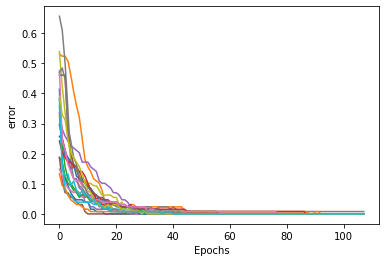

In [3]:
alpha = .05
L = 108
M = 32


for i in range(20):
    w,v,error = train()
    
    plt.plot(error)
    
plt.ylabel("error")
plt.xlabel("Epochs")

   

Although the classifier does achieve 0% training error, the number epochs required to do so varies from iteration to iteration due to the randomized permutation. 